In [1]:
import glob, os, sys, shutil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction


%load_ext autoreload
%autoreload 2
%matplotlib inline
if os.name == 'posix':
    %config InlineBackend.figure_format = 'retina' #retina display settings

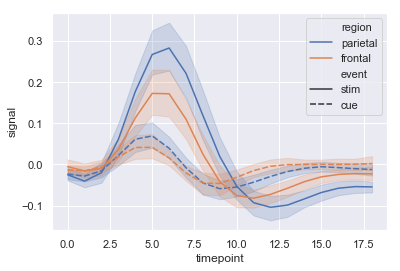

In [14]:
"""
Timeseries plot with error bands
================================

_thumb: .48, .45

"""
import seaborn as sns
sns.set(style=None)

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)


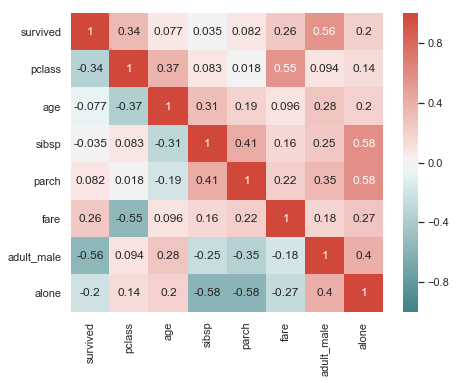

In [11]:
df = sns.load_dataset('titanic')

corr = df.corr()
corr.values[np.triu_indices_from(corr)] = np.abs(corr.values[np.triu_indices_from(corr)] )

fig = plt.figure(figsize=(7, 5.5))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(200, 15, as_cmap=True), vmin=-1, vmax=1)